In [17]:
import pandas as pd
import numpy as np

In [3]:
page1 = pd.read_csv("Page1.csv")
page1

,Affected Legal Good,Month,Value,City
0,Patrimonio,2015-01,189,Apodaca
1,Patrimonio,2015-02,238,Apodaca
2,Patrimonio,2015-03,203,Apodaca
3,Patrimonio,2015-04,196,Apodaca
4,Patrimonio,2015-05,212,Apodaca
...,...,...,...,...
6043,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-08,55,Santiago
6044,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-09,34,Santiago
6045,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-10,17,Santiago
6046,Otros Bienes Jurídicos Afectados (Del Fuero Co...,2022-11,15,Santiago


In [4]:
import pandas as pd

# Assuming your dataframe is named 'df'
page1['Month'] = pd.to_datetime(page1['Month'], format='%Y-%m')
page1['Period'] = page1['Month'].dt.to_period('Q')  # Create a new column representing the 3-month period

grouped_df = page1.groupby(['Affected Legal Good', 'City', 'Period']).agg({'Value': 'sum'}).reset_index()
grouped_df


,Affected Legal Good,City,Period,Value
0,Familia,Apodaca,2015Q1,504
1,Familia,Apodaca,2015Q2,671
2,Familia,Apodaca,2015Q3,723
3,Familia,Apodaca,2015Q4,505
4,Familia,Apodaca,2016Q1,508
...,...,...,...,...
2011,Vida e Integridad Corporal,Santiago,2021Q4,26
2012,Vida e Integridad Corporal,Santiago,2022Q1,23
2013,Vida e Integridad Corporal,Santiago,2022Q2,36
2014,Vida e Integridad Corporal,Santiago,2022Q3,36


In [5]:
from pyod.models.knn import KNN

grouped_df=grouped_df.set_index("Period")

In [6]:
df_apodaca = grouped_df[grouped_df["City"] == "Apodaca"]
df_apodaca = df_apodaca.drop(["City"], axis=1)
df_escobedo = grouped_df[grouped_df["City"] == "Escobedo"]
df_escobedo = df_escobedo.drop(["City"], axis=1)
df_garcia = grouped_df[grouped_df["City"] == "García"]
df_garcia = df_garcia.drop(["City"], axis=1)
df_guadalupe = grouped_df[grouped_df["City"] == "Guadalupe"]
df_guadalupe = df_guadalupe.drop(["City"], axis=1)
df_juarez = grouped_df[grouped_df["City"] == "Juarez"]
df_juarez = df_juarez.drop(["City"], axis=1)
df_monterrey = grouped_df[grouped_df["City"] == "Monterrey"]
df_monterrey = df_monterrey.drop(["City"], axis=1)
df_san_nico = grouped_df[grouped_df["City"] == "San Nicolás de los Garza"]
df_san_nico = df_san_nico.drop(["City"], axis=1)
df_santa = grouped_df[grouped_df["City"] == "Santa Catarina"]
df_santa = df_santa.drop(["City"], axis=1)
df_santiago = grouped_df[grouped_df["City"] == "Santiago"]
df_santiago = df_santiago.drop(["City"], axis=1)


Apodaca

In [7]:
df_encoded = pd.get_dummies(df_apodaca, columns=["Affected Legal Good"])

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(["Affected Legal Good_Familia", "Affected Legal Good_Libertad Personal", "Affected Legal Good_Libertad y Seguridad Sexual", "Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común)", "Affected Legal Good_Patrimonio", "Affected Legal Good_Sociedad", "Affected Legal Good_Vida e Integridad Corporal"], axis=1)
y = df_encoded[["Affected Legal Good_Familia", "Affected Legal Good_Libertad Personal", "Affected Legal Good_Libertad y Seguridad Sexual", "Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común)", "Affected Legal Good_Patrimonio", "Affected Legal Good_Sociedad", "Affected Legal Good_Vida e Integridad Corporal"]]

# Initialize the KNN model
knn = KNN()

# Fit the model
knn.fit(X, y)

# Make predictions
predictions = knn.predict(X)

/Users/ernestosaleh/opt/anaconda3/lib/python3.8/site-packages/pyod/models/base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [8]:
df_encoded

,Value,Affected Legal Good_Familia,Affected Legal Good_Libertad Personal,Affected Legal Good_Libertad y Seguridad Sexual,Affected Legal Good_Otros Bienes Jurídicos Afectados (Del Fuero Común),Affected Legal Good_Patrimonio,Affected Legal Good_Sociedad,Affected Legal Good_Vida e Integridad Corporal
Period,,,,,,,,
2015Q1,504,1,0,0,0,0,0,0
2015Q2,671,1,0,0,0,0,0,0
2015Q3,723,1,0,0,0,0,0,0
2015Q4,505,1,0,0,0,0,0,0
2016Q1,508,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2021Q4,232,0,0,0,0,0,0,1
2022Q1,187,0,0,0,0,0,0,1
2022Q2,184,0,0,0,0,0,0,1


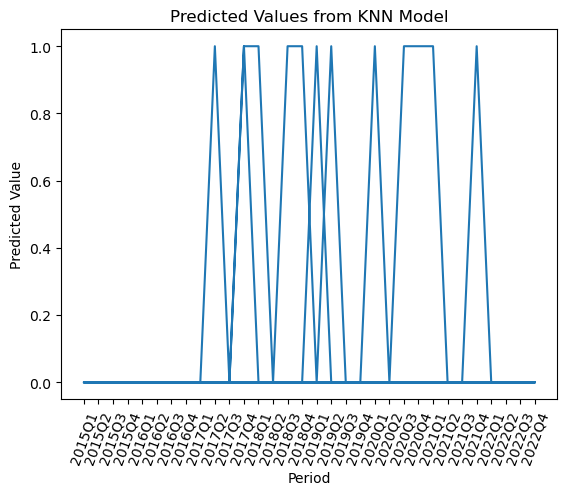

In [9]:
import matplotlib.pyplot as plt

# Convert index values to strings
df_apodaca.index = df_apodaca.index.astype(str)

# Plotting using the updated index
plt.plot(df_apodaca.index, predictions)
plt.xlabel('Period')
plt.ylabel('Predicted Value')
plt.title('Predicted Values from KNN Model')
plt.xticks(rotation=70)
plt.show()

In [48]:
pred_indx=predictions*np.arange(len(predictions))
bools=pred_indx>0
pred_indx=pred_indx[pred_indx != 0]

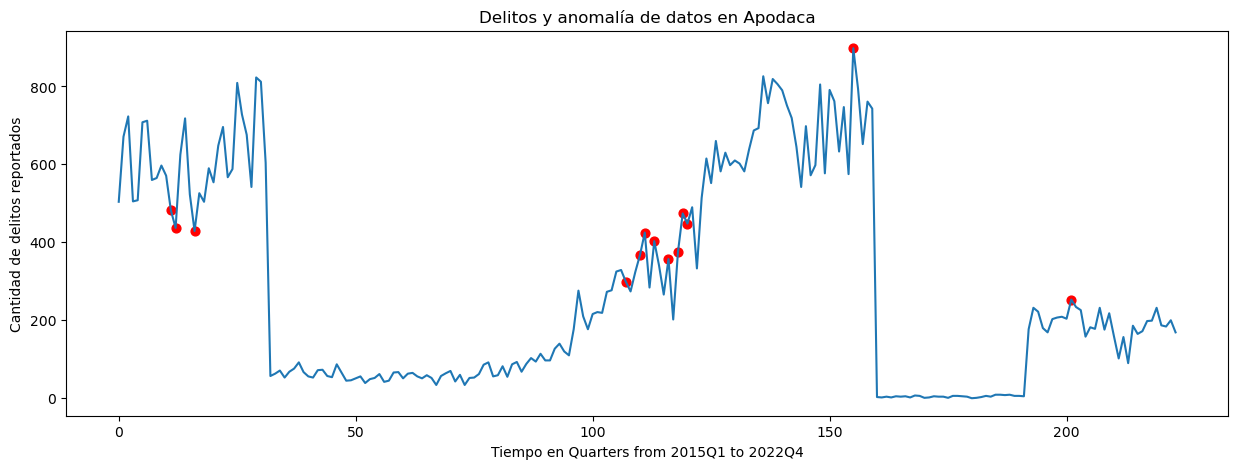

In [70]:
apodates=df_apodaca.index
apodata=np.array(df_apodaca["Value"])
plt.figure(figsize=(15,5))
plt.scatter(np.arange(len(apodata))[pred_indx], np.array(df_apodaca.iloc[pred_indx]["Value"]), s=40, c="red")
plt.plot(apodata)
plt.ylabel("Cantidad de delitos reportados")
plt.xlabel("Tiempo en Quarters from 2015Q1 to 2022Q4")
plt.title("Delitos y anomalía de datos en Apodaca")
plt.show()

In [ ]:
df_apodaca

In [29]:
apodates

Index(['2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
       '2016Q4', '2017Q1', '2017Q2',
       ...
       '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1',
       '2022Q2', '2022Q3', '2022Q4'],
      dtype='object', name='Period', length=224)

In [30]:
apodata

array([504, 671, 723, 505, 508, 708, 712, 560, 565, 597, 571, 482, 437,
       625, 718, 523, 429, 526, 504, 590, 554, 648, 696, 567, 588, 809,
       728, 676, 542, 823, 812, 604,  57,  63,  71,  53,  68,  76,  92,
        67,  56,  53,  72,  73,  57,  54,  87,  66,  45,  46,  51,  56,
        39,  49,  52,  62,  42,  45,  66,  67,  51,  63,  65,  56,  51,
        59,  52,  34,  57,  64,  70,  43,  60,  34,  52,  53,  62,  86,
        92,  56,  59,  82,  55,  87,  93,  68,  88, 103,  94, 114,  97,
        97, 127, 140, 120, 110, 177, 276, 210, 177, 216, 221, 219, 273,
       277, 325, 329, 299, 274, 324, 368, 425, 284, 403, 341, 266, 357,
       202, 375, 474, 448, 490, 333, 514, 615, 552, 660, 582, 630, 598,
       610, 602, 582, 638, 687, 693, 826, 757, 819, 806, 790, 751, 719,
       645, 542, 698, 572, 598, 805, 577, 791, 762, 633, 747, 575, 898,
       794, 652, 761, 743,   3,   2,   4,   2,   5,   4,   5,   2,   7,
         6,   1,   2,   5,   4,   4,   1,   6,   6,   5,   4,   

In [24]:
df_apodaca

,Affected Legal Good,Value
Period,,
2015Q1,Familia,504
2015Q2,Familia,671
2015Q3,Familia,723
2015Q4,Familia,505
2016Q1,Familia,508
...,...,...
2021Q4,Vida e Integridad Corporal,232
2022Q1,Vida e Integridad Corporal,187
2022Q2,Vida e Integridad Corporal,184
